In [1]:
# Import necessary libraries and modules
import sys  # Import the sys module to access system-specific parameters and functions
# Assert that the Python version is 3.5 or higher
assert sys.version_info[0] == 3  # Ensure the major version is 3
assert sys.version_info[1] >= 5  # Ensure the minor version is at least 5

from gensim.models import KeyedVectors  # Import KeyedVectors from gensim to work with pre-trained word vectors
from gensim.test.utils import datapath  # Import datapath utility from gensim for testing
import pprint  # Import pprint for pretty-printing Python data structures
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
# Set default figure size for plots
plt.rcParams['figure.figsize'] = [10, 5]  # Set the default figure size to 10x5 inches
import nltk  # Import the Natural Language Toolkit (nltk)
# Download the 'reuters' dataset from nltk
nltk.download('reuters')  # Download the Reuters dataset
from nltk.corpus import reuters  # Import the Reuters corpus from nltk
import numpy as np  # Import numpy for numerical operations
import random  # Import random for generating random numbers
import scipy as sp  # Import scipy for scientific computing
from sklearn.decomposition import TruncatedSVD  # Import TruncatedSVD for dimensionality reduction
from sklearn.decomposition import PCA  # Import PCA for Principal Component Analysis

# Define start and end tokens for the corpus
START_TOKEN = '<START>'  # Define a start token
END_TOKEN = '<END>'  # Define an end token

# Set random seeds for reproducibility
np.random.seed(0)  # Set the numpy random seed to 0
random.seed(0)  # Set the random seed to 0

[nltk_data] Downloading package reuters to /Users/khusrav/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


# Singular Value Decomposition (SVD)

## Introduction

Singular Value Decomposition (SVD) is a powerful matrix factorization technique used in various fields such as signal processing, statistics, and machine learning. It is particularly useful in reducing the dimensionality of data, solving linear systems, and understanding the structure of matrices.

SVD decomposes a given matrix $A$ into three component matrices: $U$, $S$, and $V^T$. Mathematically, SVD is represented as:

$$ A = U \Sigma V^T $$

Where:
- $A$ is an $m \times n$ matrix.
- $U$ is an $m \times m$ orthogonal matrix whose columns are the left singular vectors of $A$.
- $\Sigma$ (or $S$) is an $m \times n$ diagonal matrix whose diagonal elements are the singular values of $A$.
- $V^T$ is the transpose of an $n \times n$ orthogonal matrix $V$, whose columns are the right singular vectors of $A$.

## Detailed Explanation

### 1. Matrix $A$

Let $A$ be an $m \times n$ matrix. This matrix can be any real or complex matrix. In many applications, $A$ represents a data matrix where rows correspond to samples and columns correspond to features.

### 2. Matrix $U$

The matrix $U$ is an $m \times m$ orthogonal matrix. The columns of $U$ are called the left singular vectors of $A$. Orthogonal means that $U^T U = I$, where $I$ is the identity matrix. The left singular vectors provide an orthonormal basis for the column space of $A$.

### 3. Matrix $\Sigma$

The matrix $\Sigma$ is an $m \times n$ diagonal matrix. The diagonal entries $\sigma_1, \sigma_2, \ldots, \sigma_p$ (where $p = \min(m, n)$) are called the singular values of $A$. These singular values are non-negative and are usually arranged in descending order, i.e., $\sigma_1 \ge \sigma_2 \ge \ldots \ge \sigma_p \ge 0$. Singular values give a measure of the significance of the corresponding singular vectors.

### 4. Matrix $V^T$

The matrix $V^T$ is the transpose of an $n \times n$ orthogonal matrix $V$. The columns of $V$ are called the right singular vectors of $A$. The right singular vectors provide an orthonormal basis for the row space of $A$.

### Properties of SVD

1. **Rank of $A$**: The rank of matrix $A$ is equal to the number of non-zero singular values.
2. **Condition Number**: The condition number of $A$ is the ratio of the largest singular value to the smallest singular value.
3. **Energy of the Matrix**: The sum of the squares of the singular values equals the Frobenius norm of the matrix $A$.
   
$$\|A\|_F = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n} |a_{ij}|^2} = \sqrt{\sum_{i=1}^{\min(m,n)} \sigma_i^2}$$

5. **Low-Rank Approximation**: SVD can be used to approximate matrix $A$ by keeping only the top $k$ singular values and their corresponding vectors, which is useful for dimensionality reduction.

### Geometric Interpretation

- The left singular vectors $U$ represent the directions in the $m$-dimensional space (the domain of $A$).
- The right singular vectors $V$ represent the directions in the $n$-dimensional space (the codomain of $A$).
- The singular values $\sigma_i$ represent the scaling factors along the corresponding singular vectors.

### Example

Consider a matrix $A$:
$$ A = \begin{bmatrix}
1 & 0 & 0 & 0 & 2 \\
0 & 0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 & 0
\end{bmatrix} $$

The SVD of $A$ will decompose it into:
$$ U = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0
\end{bmatrix}, \quad \Sigma = \begin{bmatrix}
4 & 0 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 & 0 \\
0 & 0 & \sqrt{5} & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}, \quad V^T = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 & 0
\end{bmatrix} $$

The decomposition $A = U \Sigma V^T$ represents how the matrix $A$ can be reconstructed from its singular values and singular vectors.

## Applications of SVD

1. **Dimensionality Reduction**: SVD can reduce the number of dimensions while retaining the most important features of the data.
2. **Image Compression**: SVD is used to compress images by reducing the number of singular values needed to represent the image.
3. **Latent Semantic Analysis (LSA)**: SVD is used in natural language processing to find the latent structure in text data.
4. **Noise Reduction**: SVD can separate signal from noise in data, enhancing the quality of the data.

In summary, SVD is a fundamental technique in linear algebra with wide-ranging applications in data science, machine learning, and many other fields. It provides a powerful way to analyze and transform matrices, capturing essential information in a compact form.


## Word Vectors

Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore two types of word vectors: those derived from *co-occurrence matrices*, and those derived via *word2vec*. 

**Assignment Notes:** Please make sure to save the notebook as you go along. Submission Instructions are located at the bottom of the notebook.

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding) states, "*conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension*".

## Part 1: Count-Based Word Vectors (10 points)

Most word vector models start from the following idea:

*You shall know a word by the company it keeps ([Firth, J. R. 1957:11](https://en.wikipedia.org/wiki/John_Rupert_Firth))*

Many word vector implementations are driven by the idea that similar words, i.e., (near) synonyms, will be used in similar contexts. As a result, similar words will often be spoken or written along with a shared subset of words, i.e., contexts. By examining these contexts, we can try to develop embeddings for our words. With this intuition in mind, many "old school" approaches to constructing word vectors relied on word counts. Here we elaborate upon one of those strategies, *co-occurrence matrices* (for more information, see [here](http://web.stanford.edu/class/cs124/lec/vectorsemantics.video.pdf) or [here](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)).

### Co-Occurrence

A co-occurrence matrix counts how often things co-occur in some environment. Given some word $w_i$ occurring in the document, we consider the *context window* surrounding $w_i$. Supposing our fixed window size is $n$, then this is the $n$ preceding and $n$ subsequent words in that document, i.e. words $w_{i-n} \dots w_{i-1}$ and $w_{i+1} \dots w_{i+n}$. We build a *co-occurrence matrix* $M$, which is a symmetric word-by-word matrix in which $M_{ij}$ is the number of times $w_j$ appears inside $w_i$'s window.

**Example: Co-Occurrence with Fixed Window of n=1**:

Document 1: "all that glitters is not gold"

Document 2: "all is well that ends well"


|     *    | START | all | that | glitters | is   | not  | gold  | well | ends | END |
|----------|-------|-----|------|----------|------|------|-------|------|------|-----|
| START    | 0     | 2   | 0    | 0        | 0    | 0    | 0     | 0    | 0    | 0   |
| all      | 2     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| that     | 0     | 1   | 0    | 1        | 0    | 0    | 0     | 1    | 1    | 0   |
| glitters | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 0    | 0   |
| is       | 0     | 1   | 0    | 1        | 0    | 1    | 0     | 1    | 0    | 0   |
| not      | 0     | 0   | 0    | 0        | 1    | 0    | 1     | 0    | 0    | 0   |
| gold     | 0     | 0   | 0    | 0        | 0    | 1    | 0     | 0    | 0    | 1   |
| well     | 0     | 0   | 1    | 0        | 1    | 0    | 0     | 0    | 1    | 1   |
| ends     | 0     | 0   | 1    | 0        | 0    | 0    | 0     | 1    | 0    | 0   |
| END      | 0     | 0   | 0    | 0        | 0    | 0    | 1     | 1    | 0    | 0   |

**Note:** In NLP, we often add START and END tokens to represent the beginning and end of sentences, paragraphs or documents. In thise case we imagine START and END tokens encapsulating each document, e.g., "START All that glitters is not gold END", and include these tokens in our co-occurrence counts.

The rows (or columns) of this matrix provide one type of word vectors (those based on word-word co-occurrence), but the vectors will be large in general (linear in the number of distinct words in a corpus). Thus, our next step is to run *dimensionality reduction*. In particular, we will run *SVD (Singular Value Decomposition)*, which is a kind of generalized *PCA (Principal Components Analysis)* to select the top $k$ principal components. Here's a visualization of dimensionality reduction with SVD. In this picture our co-occurrence matrix is $A$ with $n$ rows corresponding to $n$ words. We obtain a full matrix decomposition, with the singular values ordered in the diagonal $S$ matrix, and our new, shorter length-$k$ word vectors in $U_k$.

![Picture of an SVD](imgs/svd.png "SVD")

This reduced-dimensionality co-occurrence representation preserves semantic relationships between words, e.g. *doctor* and *hospital* will be closer than *doctor* and *dog*. 

**Notes:** If you can barely remember what an eigenvalue is, here's [a slow, friendly introduction to SVD](https://davetang.org/file/Singular_Value_Decomposition_Tutorial.pdf). If you want to learn more thoroughly about PCA or SVD, feel free to check out lectures [7](https://web.stanford.edu/class/cs168/l/l7.pdf), [8](http://theory.stanford.edu/~tim/s15/l/l8.pdf), and [9](https://web.stanford.edu/class/cs168/l/l9.pdf) of CS168. These course notes provide a great high-level treatment of these general purpose algorithms. Though, for the purpose of this class, you only need to know how to extract the k-dimensional embeddings by utilizing pre-programmed implementations of these algorithms from the numpy, scipy, or sklearn python packages. In practice, it is challenging to apply full SVD to large corpora because of the memory needed to perform PCA or SVD. However, if you only want the top $k$ vector components for relatively small $k$ — known as *[Truncated SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition#Truncated_SVD)* — then there are reasonably scalable techniques to compute those iteratively.

### Plotting Co-Occurrence Word Embeddings

Here, we will be using the Reuters (business and financial news) corpus. If you haven't run the import cell at the top of this page, please run it now (click it and press SHIFT-RETURN). The corpus consists of 10,788 news documents totaling 1.3 million words. These documents span 90 categories and are split into train and test. For more details, please see https://www.nltk.org/book/ch02.html. We provide a `read_corpus` function below that pulls out only articles from the "crude" (i.e. news articles about oil, gas, etc.) category. The function also adds START and END tokens to each of the documents, and lowercases words. You do **not** have perform any other kind of pre-processing.

In [27]:
# Define a function to read the Reuters corpus from a specified category
''' category = "crude", you are filtering and working with documents that are 
tagged with the "crude" category. These documents are related to crude oil topics.'''
def read_corpus(category="crude"):
    """
    Read files from the specified Reuter's category.
    Params:
        category (string): category name
    Return:
        list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)  # Get file ids for the specified category
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]  # Return a list of lists with words

# Print a few examples from the Reuters corpus to see what they look like
reuters_corpus = read_corpus()  # Read the corpus from the 'crude' category
pprint.pprint(reuters_corpus[:3], compact=True, width=100)  # Pretty-print the first 3 documents



[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

Let's have a look what these documents are like….

In [28]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

### Question 1.1: Implement `distinct_words` 

Write a method to work out the distinct words (word types) that occur in the corpus. You can do this with `for` loops, but it's more efficient to do it with Python list comprehensions. In particular, [this](https://coderwall.com/p/rcmaea/flatten-a-list-of-lists-in-one-line-in-python) may be useful to flatten a list of lists. If you're not familiar with Python list comprehensions in general, here's [more information](https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html).

You may find it useful to use [Python sets](https://www.w3schools.com/python/python_sets.asp) to remove duplicate words.

In [29]:
# Define a function to find distinct words in the corpus
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            n_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    n_corpus_words = -1
    
    ### SOLUTION BEGIN
    flattened_corpus = [word for document in corpus for word in document]
    distinct_words = set(flattened_corpus)
    corpus_words = sorted(distinct_words)
    n_corpus_words = len(corpus_words)
    ### SOLUTION END

    return corpus_words, n_corpus_words

In [30]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

# Define toy corpus
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted(list(set(["START", "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", "END"])))
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 1.2: Implement `compute_co_occurrence_matrix` 

Write a method that constructs a co-occurrence matrix for a certain window-size $n$ (with a default of 4), considering words $n$ before and $n$ after the word in the center of the window. Here, we start to use `numpy (np)` to represent vectors, matrices, and tensors. If you're not familiar with NumPy, there's a NumPy tutorial in the second half of this cs231n [Python NumPy tutorial](http://cs231n.github.io/python-numpy-tutorial/).


In [31]:
# Define a function to compute the co-occurrence matrix for the corpus
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, n_words = distinct_words(corpus)
    M = None
    word2ind = {}
    
    ### SOLUTION BEGIN
    # init Matrix M
    M = np.zeros((n_words, n_words))
    # word2ind dictionary that maps word to index
    word2ind = {word: i for i, word in enumerate(words)}

    for document in corpus:
        for i, word in enumerate(document):
            # Loop through the context window
            for j in range(max(0, i - window_size), min(len(document), i + window_size + 1)):
                # Don't include the word itself
                if j != i:
                    M[word2ind[word], word2ind[document[j]]] += 1
    ### SOLUTION END

    return M, word2ind

In [32]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2Ind
M_test_ans = np.array( 
    [[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,],
     [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,],
     [0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,]]
)
word2Ind_ans = {'All': 0, "All's": 1, 'END': 2, 'START': 3, 'ends': 4, 'glitters': 5, 'gold': 6, "isn't": 7, 'that': 8, 'well': 9}

# Test correct word2Ind
assert (word2Ind_ans == word2Ind_test), "Your word2Ind is incorrect:\nCorrect: {}\nYours: {}".format(word2Ind_ans, word2Ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2Ind_ans.keys():
    idx1 = word2Ind_ans[w1]
    for w2 in word2Ind_ans.keys():
        idx2 = word2Ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 1.3: Implement `reduce_to_k_dim` 

Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. Use SVD to take the top k components and produce a new matrix of k-dimensional embeddings. 

**Note:** All of numpy, scipy, and scikit-learn (`sklearn`) provide *some* implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use [sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [33]:
# Define a function to reduce the co-occurrence matrix to k dimensions using SVD
def reduce_to_k_dim(M, k=2):
    """
    Reduce a co-occurrence count matrix of dimensionality (num_corpus_words, num_corpus_words)
    to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-learn:
        - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

    Params:
        M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurrence matrix of word counts
        k (int): embedding size of each word after dimension reduction
    Return:
        M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensional word embeddings.
        In terms of the SVD from math class, this actually returns U * S
    """
    n_iters = 10   # Number of iterations for SVD
    M_reduced = None  # Initialize the reduced matrix as None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))  # Print the number of words
    
    # Apply Truncated SVD to reduce the dimensionality
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)  # Initialize Truncated SVD with k components
    M_reduced = svd.fit_transform(M)  # Fit and transform the co-occurrence matrix
    
    print("Done.")  # Print 'Done' when SVD is complete
    return M_reduced  # Return the reduced matrix

In [34]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["START All that glitters isn't gold END".split(" "), "START All's well that ends well END".split(" ")]
M_test, word2Ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 1.4: Implement `plot_embeddings` 

Here you will write a function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (`plt`).

For this example, you may find it useful to adapt [this code](https://www.pythonmembers.club/2018/05/08/matplotlib-scatter-plot-annotate-set-text-at-label-each-point/). In the future, a good way to make a plot is to look at [the Matplotlib gallery](https://matplotlib.org/gallery/index.html), find a plot that looks somewhat like what you want, and adapt the code they give.

In [47]:
# Define a function to plot the embeddings of specified words
def plot_embeddings(M_reduced, word2Ind, words):
    """
    Plot in a scatterplot the embeddings of the words specified in the list "words".
    NOTE: do not plot all the words listed in M_reduced / word2Ind. Include a label next to each point.

    Params:
        M_reduced (numpy matrix of shape (number of unique words in the corpus, k)): matrix of k-dimensional word embeddings
        word2Ind (dict): dictionary that maps word to indices for matrix M
        words (list of strings): words whose embeddings we want to visualize
    """
    # Plot each word in the list with its corresponding embedding
    for word in words:  # Iterate through each word in the list
        word_id = word2Ind[word]  # Get the index of the word
        x, y = M_reduced[word_id]  # Get the 2D coordinates of the word embedding
        plt.scatter(x, y, marker='x', color='red')  # Plot the word as a red 'x'
        plt.text(x, y, word, fontsize=10)  # Add a label next to the point
    plt.show()  # Display the plot

--------------------------------------------------------------------------------
Outputted Plot:


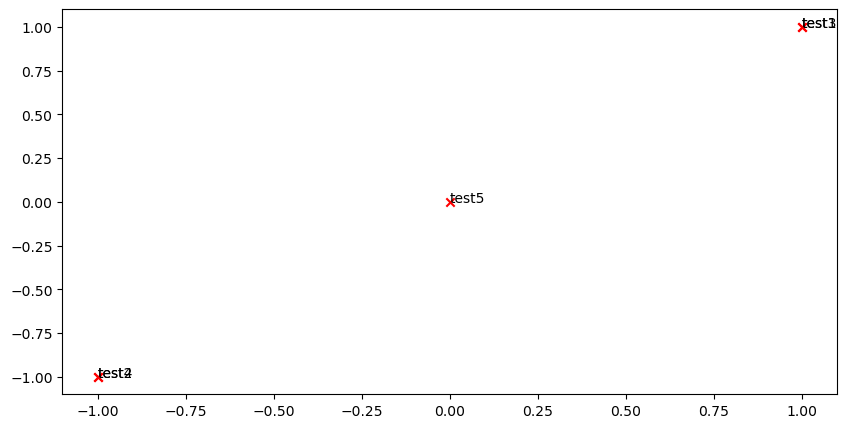

--------------------------------------------------------------------------------


In [49]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------
# Sanity check for the plot function
print("-" * 80)  # Print a separator line
print("Outputted Plot:")  # Print a message

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, 1], [-1, -1], [0, 0]])  # Define a test matrix
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}  # Define a test word-to-index mapping
words = ['test1', 'test2', 'test3', 'test4', 'test5']  # Define a list of test words
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)  # Plot the test embeddings

print("-" * 80)  # Print a separator line

<font color=red>**Test Plot Solution**</font>
<br>
<img src="imgs/test_plot.png" width=40% style="float: left;"> </img>


### Question 1.5: Co-Occurrence Plot Analysis 

Now we will put together all the parts you have written! We will compute the co-occurrence matrix with fixed window of 4, over the Reuters "crude" corpus. Then we will use TruncatedSVD to compute 2-dimensional embeddings of each word. TruncatedSVD returns U\*S, so we normalize the returned vectors, so that all the vectors will appear around the unit circle (therefore closeness is directional closeness). **Note**: The line of code below that does the normalizing uses the NumPy concept of *broadcasting*. If you don't know about broadcasting, check out
[Computation on Arrays: Broadcasting by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).

Run the below cell to produce the plot. It'll probably take a few seconds to run. What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have?  **Note:** "bpd" stands for "barrels per day" and is a commonly used abbreviation in crude oil topic articles.

Running Truncated SVD over 8185 words...
Done.


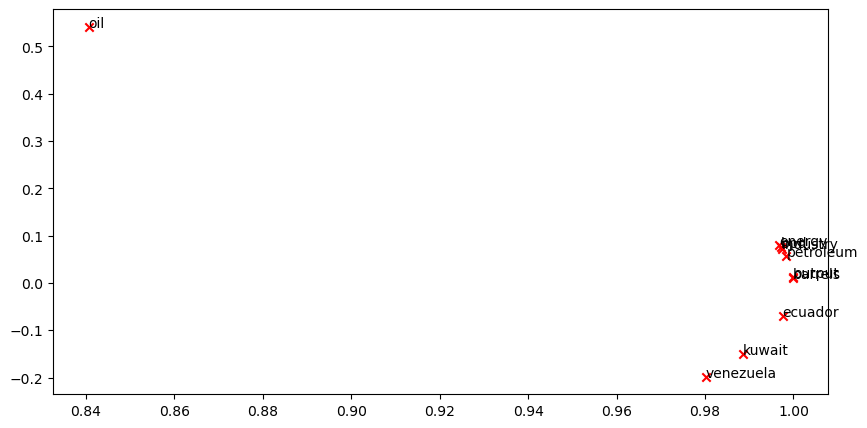

In [50]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------

# Compute the co-occurrence matrix and plot the embeddings for the Reuters corpus
reuters_corpus = read_corpus()  # Read the corpus from the 'crude' category
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)  # Compute the co-occurrence matrix
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)  # Reduce the co-occurrence matrix to 2 dimensions

# Rescale the rows of the reduced matrix to unit length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)  # Compute the lengths of the vectors
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis]  # Use broadcasting to normalize the vectors

# Plot the embeddings of specific words
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_normalized, word2Ind_co_occurrence, words)  # Plot the normalized embeddings


##### What clusters together in 2-dimensional embedding space?

* Group A:
    * industry
    * petroleum
* Group B:
    * energy
    * oil
    * kuwait
* Group C:
    * ecuador
    * output
    * venezuela
    * barrels
* Group D:
    * bpd
    
##### What doesn't cluster together that you might think should have?

I think all the place names should be cluster together. Such as Kuwait, Ecuador, Venezuela.

I don't think the performance of this co-ocurrence matrix method is doing well.


## Part 2: Prediction-Based Word Vectors
 If you're feeling adventurous, challenge yourself and try reading the [original paper](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf).

Then run the following cells to load the word2vec vectors into memory. **Note**: This might take several minutes.

In [51]:

# Define a function to load Word2Vec vectors
def load_word2vec():
    """
    Load Word2Vec Vectors
    Return:
        wv_from_bin: All 3 million embeddings, each length 300
    """
    import gensim.downloader as api  # Import gensim downloader to load pre-trained models
    wv_from_bin = api.load("word2vec-google-news-200")  # Load pre-trained Word2Vec vectors
    vocab = list(wv_from_bin.index_to_key)  # Get the vocabulary from the loaded vectors
    
    print("Loaded vocab size %i" % len(vocab))  # Print the size of the loaded vocabulary
    return wv_from_bin  # Return the loaded vectors

# Load the Word2Vec vectors
wv_from_bin = load_word2vec()  # Call the function to load Word2Vec vectors

Loaded vocab size 3000000


**Note: If you are receiving out of memory issues on your local machine, try closing other applications to free more memory on your device. You may want to try restarting your machine so that you can free up extra memory. Then immediately run the jupyter notebook and see if you can load the word vectors properly. If you still have problems with loading the embeddings onto your local machine after this, please follow the Piazza instructions, as how to run remotely on Stanford Farmshare machines.**

### Reducing dimensionality of Word2Vec Word Embeddings
Let's directly compare the word2vec embeddings to those of the co-occurrence matrix. Run the following cells to:

1. Put the 3 million word2vec vectors into a matrix M
2. Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 300-dimensional to 2-dimensional.

In [35]:
# Define a function to get a matrix of word vectors for specified words
def get_matrix_of_vectors(wv_from_bin, required_words=['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    """
    Put the word2vec vectors into a matrix M.
    Param:
        wv_from_bin: KeyedVectors object; the 3 million word2vec vectors loaded from file
    Return:
        M: numpy matrix shape (num words, 300) containing the vectors
        word2Ind: dictionary mapping each word to its row number in M
    """
    import random  # Import random for shuffling words
    words = list(wv_from_bin.index_to_key)  # Get the list of words from the pre-trained Word2Vec vectors
    print("Shuffling words ...")  # Print a message indicating the words are being shuffled
    random.shuffle(words)  # Shuffle the words to randomize their order
    words = words[:10000]  # Select the first 10,000 words from the shuffled list
    
    print("Putting %i words into word2Ind and matrix M..." % len(words))  # Print the number of words being processed
    word2Ind = {}  # Initialize a dictionary to map words to their indices
    M = []  # Initialize an empty list to hold the word vectors
    curInd = 0  # Initialize the current index to 0
    
    for w in words:  # Iterate over each word in the list
        try:
            M.append(wv_from_bin.word_vec(w))  # Add the word vector to the list M
            word2Ind[w] = curInd  # Map the word to the current index
            curInd += 1  # Increment the current index
        except KeyError:
            continue  # Skip words that are not in the vocabulary
    
    for w in required_words:  # Iterate over the required words
        try:
            M.append(wv_from_bin.word_vec(w))  # Add the word vector to the list M
            word2Ind[w] = curInd  # Map the word to the current index
            curInd += 1  # Increment the current index
        except KeyError:
            continue  # Skip words that are not in the vocabulary
    
    M = np.stack(M)  # Convert the list of word vectors to a numpy array
    print("Done.")  # Print a message indicating the process is done
    return M, word2Ind  # Return the matrix of word vectors and the word-to-index dictionary





In [54]:
# -----------------------------------------------------------------
# Run Cell to Reduce 300-Dimensinal Word Embeddings to k Dimensions
# Note: This may take several minutes
# -----------------------------------------------------------------
# Get the matrix of word vectors and reduce to 2 dimensions
M, word2Ind = get_matrix_of_vectors(wv_from_bin)  # Get the matrix of word vectors and the word-to-index mapping
M_reduced = reduce_to_k_dim(M, k=2)  # Reduce the dimensionality of the word vectors to 2 dimensions

Shuffling words ...
Putting 10000 words into word2Ind and matrix M...
Done.


/var/folders/56/959n4wfx63n7z7tn3_8j10kh0000gn/T/ipykernel_23252/571516218.py:73: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))
/var/folders/56/959n4wfx63n7z7tn3_8j10kh0000gn/T/ipykernel_23252/571516218.py:80: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  M.append(wv_from_bin.word_vec(w))


Running Truncated SVD over 10010 words...
Done.


### Question 2.1: Word2Vec Plot Analysis 
Run the cell below to plot the 2D word2vec embeddings for `['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']`.

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have? How is the plot different from the one generated earlier from the co-occurrence matrix?

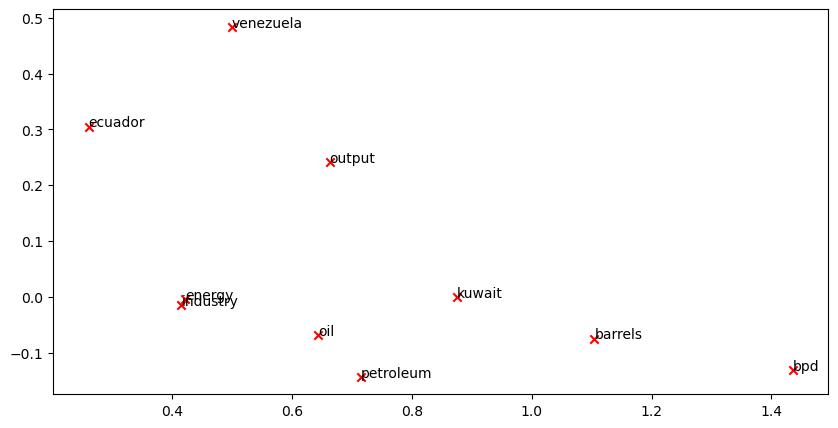

In [55]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
plot_embeddings(M_reduced, word2Ind, words)



##### What clusters together in 2-dimensional embedding space?

Maybe just

* industry
* energy
    
##### What doesn't cluster together that you might think should have?

Almost every things that are seperated from each other for about same distance.

Not as I expect that the place name will cluster together.

##### How is the plot different from the one generated earlier from the co-occurrence matrix?

The clustering phenomemon is much less obvious here.

### Cosine Similarity
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

<img src="imgs/inner_product.png" width=20% style="float: center;"></img>

Instead of computing the actual angle, we can leave the similarity in terms of $similarity = cos(\Theta)$. Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### Question 2.2: Polysemous Words
Find a [polysemous](https://en.wikipedia.org/wiki/Polysemy) word (for example, "leaves" or "scoop") such that the top-10 most similar words (according to cosine similarity) contains related words from *both* meanings. For example, "leaves" has both "vanishes" and "stalks" in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous words before you find one. Please state the polysemous word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous words you tried didn't work?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [56]:
# ------------------
# Write your polysemous word exploration code here.

# Print the most similar words to given words to explore polysemous words
pprint.pprint(wv_from_bin.most_similar('leaves'))  # Print the most similar words to 'leaves'
pprint.pprint(wv_from_bin.most_similar('scoop'))  # Print the most similar words to 'scoop'
pprint.pprint(wv_from_bin.most_similar('bank'))  # Print the most similar words to 'bank'


# ------------------

[('leaving', 0.5886486172676086),
 ('arrives', 0.5362045764923096),
 ('left', 0.522864580154419),
 ('Leaves', 0.5153513550758362),
 ('leave', 0.5131403803825378),
 ('departs', 0.510783314704895),
 ('lingers', 0.4776709973812103),
 ('vanishes', 0.4696614444255829),
 ('stalks', 0.46650534868240356),
 ('sends', 0.4623021185398102)]
[('scoops', 0.6741111278533936),
 ('scooped', 0.5712401270866394),
 ('Royal_Wedding_Meltdowns', 0.5508615374565125),
 ('Restrictions_Leash', 0.5447813868522644),
 ('Use_melon_baller', 0.5258613228797913),
 ('scooping', 0.5147117376327515),
 ('news@morehorror.com', 0.511491060256958),
 ('handed_waffle_cone', 0.49177807569503784),
 ('lowdown', 0.48571455478668213),
 ('techie_breakie', 0.47323933243751526)]
[('banks', 0.7440759539604187),
 ('banking', 0.690161406993866),
 ('Bank', 0.6698698401451111),
 ('lender', 0.6342284679412842),
 ('banker', 0.6092953085899353),
 ('depositors', 0.6031531691551208),
 ('mortgage_lender', 0.5797975659370422),
 ('depositor', 0.571

### Question 2.3: Synonyms & Antonyms

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but Cosine Distance(w1,w3) < Cosine Distance(w1,w2). For example, w1="happy" is closer to w3="sad" than to w2="cheerful". 

Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the `wv_from_bin.distance(w1, w2)` function here in order to compute the cosine distance between two words. Please see the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance)__ for further assistance.

In [57]:
# ------------------
# Write your synonym & antonym exploration code here.

# Task 2.3: Synonyms & Antonyms
w1 = "fun"  # Define the first word
w2 = "interesting"  # Define the second word (synonym of w1)
w3 = "boring"  # Define the third word (antonym of w1)

# Calculate the cosine distance between the words
w1_w2_dist = wv_from_bin.distance(w1, w2)  # Calculate the distance between w1 and w2
w1_w3_dist = wv_from_bin.distance(w1, w3)  # Calculate the distance between w1 and w3

# Print the distances
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))  # Print the distance between synonyms
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))  # Print the distance between antonyms

# ------------------

Synonyms fun, interesting have cosine distance: 0.5479990839958191
Antonyms fun, boring have cosine distance: 0.5349873304367065



#### Why this counter-intuitive (antonyms' distance < synonyms' distance) result may have happened?

Assume each of the the embedding's dimension got a meaning. An antonym can be considered as only reverse on one dimension. But basically they are describing the same thing. For example, the happy and sad are both describing the mood.
But a synonym maybe has a nother meaning or be used in different situation. For example, cheerful may be used or describing other thing maybe not mood.
From another aspect, we can replace the happy with sad in most case and fit the sentence, but maybe not so suitable cheerful.

### Solving Analogies with Word Vectors
Word2Vec vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x", what is x?

In the cell below, we show you how to use word vectors to find x. The `most_similar` function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will be the word ranked most similar (largest numerical value).

**Note:** Further Documentation on the `most_similar` function can be found within the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [ ]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

### Question 2.4: Finding Analogies 
Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences.

**Note**: You may have to try many analogies to find one that works!

In [ ]:
# ------------------
# Write your analogy exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['fantastic', 'good'], negative=['bad']))
pprint.pprint(wv_from_bin.most_similar(positive=['chinese', 'america'], negative=['china']))

# ------------------

##### State the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences?

We can see that terrific is kind of fit this case, but the rest of the results are not quite the "opposite" meaning of fantastic.

The second case works pretty well.

### Question 2.5: Incorrect Analogy
Find an example of analogy that does *not* hold according to these vectors. In your solution, state the intended analogy in the form x:y :: a:b, and state the (incorrect) value of b according to the word vectors.

In [ ]:
# ------------------
# Write your incorrect analogy exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['soil', 'food'], negative=['plant']))

# ------------------

##### State the (incorrect) value of b according to the word vectors

I was expected soil as to plant is food as to human or animal. But the result is all food.

### Question 2.6: Guided Analysis of Bias in Word Vectors 
It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit to our word embeddings.

Run the cell below, to examine (a) which terms are most similar to "woman" and "boss" and most dissimilar to "man", and (b) which terms are most similar to "man" and "boss" and most dissimilar to "woman". What do you find in the top 10?

In [ ]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'boss'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'boss'], negative=['woman']))




##### What do you find in the top 10?

I thinks that because the gender stereotype that we will expect the boss to be man. Thus it's hard to find a woman version "boss".

### Question 2.7: Independent Analysis of Bias in Word Vectors [code + written]  (2 points)

Use the `most_similar` function to find another case where some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.

In [ ]:
# ------------------
# Write your bias exploration code here.

pprint.pprint(wv_from_bin.most_similar(positive=['man', 'waiter'], negative=['woman']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['king', 'president'], negative=['queen']))

# ------------------

##### Briefly explain the example of bias that you discover

In the first case I was expected it will show up waitress. But it didn't. I think it is similar with the "boss" case. But we do have the woman version of waiter.

The second case do pretty well. I think king vs. queen is somehow equivalent to man vs. woman. And found that woman can be president too in this case.

### Question 2.8: Thinking About Bias 

What might be the cause of these biases in the word vectors?

The embedding is trained by the corpus. In the corpus, if the choose of words has some kinds of stereotype then it might learn the bias.